<a href="https://colab.research.google.com/github/mariumnour/Project-1/blob/main/BACHFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to access the CSV files
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path of the folder containing the CSV files on Google Drive
folder_path = '/content/drive/MyDrive/datasets'

# Define the list of CSV files to load
file_names = ['02-14-2018.csv',
              '02-15-2018.csv',
              '02-16-2018.csv',
              '02-20-2018.csv',
              '02-21-2018.csv',
              '02-22-2018.csv',
              '02-23-2018.csv',
              '02-28-2018.csv',
              '03-01-2018.csv',
              '03-02-2018.csv']

# Load each CSV file into a dataframe, clean it, and split it into train and test sets
train_dfs = []
test_dfs = []
for file_name in file_names:
    file_path = f'{folder_path}/{file_name}'
    df = pd.read_csv(file_path, low_memory=False)
    
    # Remove rows with missing or invalid values
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    
    # Drop columns with constant or near-constant values
    constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
    df = df.drop(constant_cols, axis=1)
    
    # Drop rows with duplicated values
    df = df.drop_duplicates()

    # Convert categorical features to numerical features
    cat_cols = [col for col in df.columns if col != 'Label' and df[col].dtype == 'object']
    for col in cat_cols:
        df[col] = pd.factorize(df[col])[0]
    
    # Split the dataframe into train and test sets
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    
    train_dfs.append(train_df)
    test_dfs.append(test_df)

# Concatenate all the train and test dataframes
train_df = pd.concat(train_dfs, axis=0)
test_df = pd.concat(test_dfs, axis=0)

# Save the new train and test dataframes to CSV files in your Google Drive
#train_df.to_csv('/content/drive/MyDrive/path/to/new_train_file.csv', index=False)
#test_df.to_csv('/content/drive/MyDrive/path/to/new_test_file.csv', index=False)

Mounted at /content/drive


<ipython-input-1-4a1e7a3fc901>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.factorize(df[col])[0]
<ipython-input-1-4a1e7a3fc901>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.factorize(df[col])[0]
<ipython-input-1-4a1e7a3fc901>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [2]:
# Print the label column
print(train_df['Label'])

# Identify the names and numbers of each attack
attack_names = train_df['Label'].unique()
attack_numbers = train_df['Label'].value_counts()

print("Attack Names:")
for name in attack_names:
    print(name)

print("\nAttack Numbers:")
print(attack_numbers)


358356    SSH-Bruteforce
519437            Benign
511210            Benign
438524            Benign
529818            Benign
               ...      
326327               Bot
444637            Benign
159381            Benign
177947               Bot
146532               Bot
Name: Label, Length: 3087414, dtype: object
Attack Names:
SSH-Bruteforce
Benign
FTP-BruteForce
DoS attacks-GoldenEye
DoS attacks-Slowloris
DoS attacks-Hulk
DoS attacks-SlowHTTPTest
DDoS attacks-LOIC-HTTP
DDOS attack-HOIC
DDOS attack-LOIC-UDP
Brute Force -Web
SQL Injection
Brute Force -XSS
Infilteration
Label
Bot

Attack Numbers:
Benign                      2065182
DDOS attack-HOIC             342679
Bot                          167222
DoS attacks-Hulk             159269
Infilteration                128777
SSH-Bruteforce                93886
DDoS attacks-LOIC-HTTP        39936
DoS attacks-GoldenEye         33189
FTP-BruteForce                31380
DoS attacks-SlowHTTPTest      15603
DoS attacks-Slowloris          817

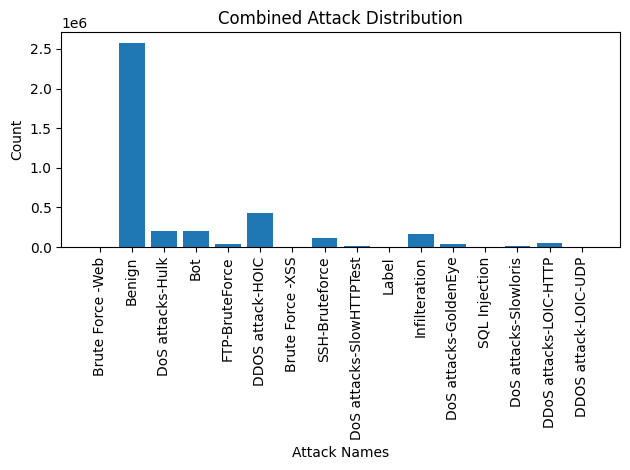

In [3]:
import matplotlib.pyplot as plt

# Identify the names and numbers of each attack in the training dataset
train_attack_names = train_df['Label'].unique()
train_attack_numbers = train_df['Label'].value_counts()

# Identify the names and numbers of each attack in the testing dataset
test_attack_names = test_df['Label'].unique()
test_attack_numbers = test_df['Label'].value_counts()

# Combine the attack information from both datasets
combined_attack_names = list(set(train_attack_names) | set(test_attack_names))
combined_attack_numbers = {name: train_attack_numbers.get(name, 0) + test_attack_numbers.get(name, 0) for name in combined_attack_names}

# Create a bar plot of combined attack numbers
plt.bar(combined_attack_names, combined_attack_numbers.values())
plt.xlabel('Attack Names')
plt.ylabel('Count')
plt.title('Combined Attack Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


In [4]:
# Define the mapping for label transformation
label_mapping = {
    'Benign': 'benign',
    'DDOS attack-HOIC': 'intrusion',
    'Bot': 'intrusion',
    'DoS attacks-Hulk': 'intrusion',
    'Infilteration': 'intrusion',
    'SSH-Bruteforce': 'intrusion',
    'DDoS attacks-LOIC-HTTP': 'intrusion',
    'DoS attacks-GoldenEye': 'intrusion',
    'FTP-BruteForce': 'intrusion',
    'DoS attacks-SlowHTTPTest': 'intrusion',
    'DoS attacks-Slowloris': 'intrusion',
    'DDOS attack-LOIC-UDP': 'intrusion',
    'Brute Force -Web': 'intrusion',
    'Brute Force -XSS': 'intrusion',
    'SQL Injection': 'intrusion'
}

# Transform the label column
train_df['Label'] = train_df['Label'].map(label_mapping)
test_df['Label'] = test_df['Label'].map(label_mapping)


In [5]:
# Print the modified "Label" column
print(train_df['Label'])


358356    intrusion
519437       benign
511210       benign
438524       benign
529818       benign
            ...    
326327    intrusion
444637       benign
159381       benign
177947    intrusion
146532    intrusion
Name: Label, Length: 3087414, dtype: object


In [6]:
# Replace 'Benign' with 0 and 'intrusion' with 1 in the "Label" column
train_df['Label'] = train_df['Label'].replace({'benign': 0, 'intrusion': 1})
test_df['Label'] = test_df['Label'].replace({'benign': 0, 'intrusion': 1})

# Replace non-finite values (NaN or inf) with a default value (-1)
train_df['Label'] = train_df['Label'].fillna(-1)
test_df['Label'] = test_df['Label'].fillna(-1)

# Convert the "Label" column to int type
train_df['Label'] = train_df['Label'].astype(int)
test_df['Label'] = test_df['Label'].astype(int)

# Print the modified "Label" column
print(train_df['Label'])


358356    1
519437    0
511210    0
438524    0
529818    0
         ..
326327    1
444637    0
159381    0
177947    1
146532    1
Name: Label, Length: 3087414, dtype: int64


In [7]:
# Remove rows with Label = -1 from train_df
train_df = train_df[train_df['Label'] != -1]

# Remove rows with Label = -1 from test_df
test_df = test_df[test_df['Label'] != -1]
import numpy as np

# Print the unique values in the "Label" column of train_df
unique_labels_train = np.unique(train_df['Label'])
print("Unique labels in train_df:", unique_labels_train)

# Print the unique values in the "Label" column of test_df
unique_labels_test = np.unique(test_df['Label'])
print("Unique labels in test_df:", unique_labels_test)

Unique labels in train_df: [0 1]
Unique labels in test_df: [0 1]


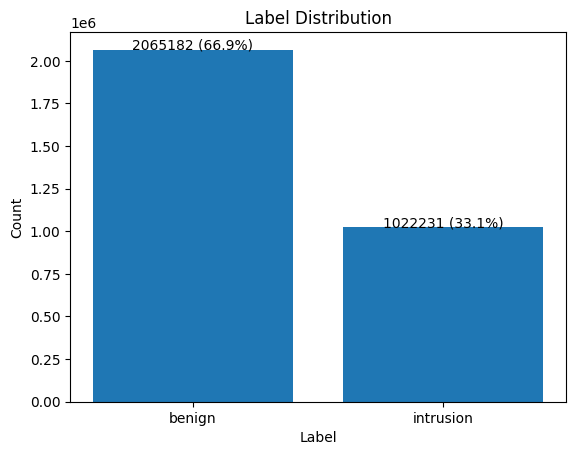

In [8]:
# Convert the label column to integers
train_df['Label'] = train_df['Label'].astype(int)

# Count the occurrences of each label
label_counts = train_df['Label'].value_counts()

# Calculate the percentage of each label
label_percentages = label_counts / len(train_df) * 100

# Create a bar plot of the label counts and percentages
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')

# Set the x-ticks and labels
plt.xticks(label_counts.index, ['benign', 'intrusion'])

# Display the percentage values on the plot
for i, v in enumerate(label_counts.values):
    plt.text(i, v, f"{v} ({label_percentages[i]:.1f}%)", ha='center')

plt.show()

In [9]:
print(train_df.isnull().sum())

Dst Port                  0
Protocol                  0
Timestamp                 0
Flow Duration             0
Tot Fwd Pkts              0
                     ...   
Fwd Pkts/b Avg      2342019
Fwd Blk Rate Avg    2342019
Bwd Byts/b Avg      2342019
Bwd Pkts/b Avg      2342019
Bwd Blk Rate Avg    2342019
Length: 80, dtype: int64


In [10]:
# Check which columns have null values
print(train_df.isnull().any())

# Remove all rows with null values
train_df.dropna(inplace=True)

Dst Port            False
Protocol            False
Timestamp           False
Flow Duration       False
Tot Fwd Pkts        False
                    ...  
Fwd Pkts/b Avg       True
Fwd Blk Rate Avg     True
Bwd Byts/b Avg       True
Bwd Pkts/b Avg       True
Bwd Blk Rate Avg     True
Length: 80, dtype: bool


In [11]:
print(test_df.isnull().sum())

Dst Port                 0
Protocol                 0
Timestamp                0
Flow Duration            0
Tot Fwd Pkts             0
                     ...  
Fwd Pkts/b Avg      585508
Fwd Blk Rate Avg    585508
Bwd Byts/b Avg      585508
Bwd Pkts/b Avg      585508
Bwd Blk Rate Avg    585508
Length: 80, dtype: int64


In [12]:
# Check which columns have null values
print(test_df.isnull().any())

# Remove all rows with null values
test_df.dropna(inplace=True)

Dst Port            False
Protocol            False
Timestamp           False
Flow Duration       False
Tot Fwd Pkts        False
                    ...  
Fwd Pkts/b Avg       True
Fwd Blk Rate Avg     True
Bwd Byts/b Avg       True
Bwd Pkts/b Avg       True
Bwd Blk Rate Avg     True
Length: 80, dtype: bool


In [13]:
display(train_df)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,CWE Flag Count,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg
589852,3,1,8586,147680.0,2,1,1,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388937,2,0,4494,7893.0,46,11,209,1.0,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498659,0,0,9414,9684.0,2,1,18,1.0,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221529,53,2,16070,8832.0,33,2,357,922.0,114,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418805,3969,0,1439,1409.0,33,2,1,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122117,42,1,207,62017.0,39,3,226,759.0,125,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262465,5722,3,68,719.0,39,3,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134242,9,3,219,67195.0,0,14,620,0.0,21,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149274,42,1,232,2276.0,39,3,221,1058.0,158,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# # Drop the columns from the train and test dataframes
train_df = train_df.drop(["Timestamp"], axis=1)
test_df = test_df.drop(["Timestamp"], axis=1)

In [15]:
X_train = train_df.loc[:, ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]
y_train = train_df['Label']
X_test = test_df.loc[:, ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]
y_test = test_df['Label']

In [16]:
import gc
import pandas as pd
from os import getcwd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.decomposition import PCA

# Assume X_train is your training feature matrix
pca = PCA(n_components=10) # Create a PCA object with 10 components
X_train_pca = pca.fit_transform(X_train) # Apply PCA to the training data

# Assume X_test is your testing feature matrix
X_test_pca = pca.transform(X_test) # Apply PCA to the testing data using the same PCA object

In [18]:
# Assume pca is your PCA object
components = pca.components_

# Print the first 10 components
print(components[:10])

[[ 1.83828364e-01 -2.28812038e-05  1.77460741e-05  2.45449688e-04
   7.79247611e-03  2.10719145e-02  3.47166907e-05  1.06237876e-02
   1.87863655e-02  4.28037431e-01  3.94540297e-01  2.84178331e-01
   3.15399973e-01  1.35090170e-01  2.04998910e-01  2.02847857e-01
   1.42764883e-01  1.49320103e-01  1.54124267e-01  8.04825553e-02
  -3.61248974e-06  5.54065184e-05  3.88223709e-01  3.37116414e-01
   7.62195618e-05  2.25076214e-02  4.18673105e-02  3.39740708e-02
  -2.86871277e-08 -1.07764130e-07  6.37339672e-08 -3.02831423e-07
  -7.40482401e-07 -2.42994491e-07 -5.30411905e-09  6.37515764e-08
  -6.46201700e-07 -1.53742698e-04  2.86039798e-04  7.79247611e-03
   1.06237876e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.28812038e-05
   9.49195187e-04  1.77460741e-05  1.69998437e-03 -1.53742698e-04
   2.86039798e-04  7.25340946e-06 -3.26727641e-06  2.56101925e-02
   1.66301560e-02  2.14617441e-02  1.12690436e-02  2.95059468e-02
   1.91769

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model on the training data and evaluate on the testing data
history = model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

# Print the final testing accuracy
score = model.evaluate(X_test_pca, y_test, verbose=0)
print('Testing accuracy:', score[1])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
23294/23294 [==============================] - 72s 3ms/step - loss: 147.9896 - accuracy: 0.7336 - val_loss: 1.9889 - val_accuracy: 0.7962
Epoch 2/10
23294/23294 [==============================] - 72s 3ms/step - loss: 1.8045 - accuracy: 0.7380 - val_loss: 2.3284 - val_accuracy: 0.7978
Epoch 3/10
23294/23294 [==============================] - 64s 3ms/step - loss: 1.8080 - accuracy: 0.7405 - val_loss: 2.6658 - val_accuracy: 0.8271
Epoch 4/10
23294/23294 [==============================] - 83s 4ms/step - loss: 1.7891 - accuracy: 0.7398 - val_loss: 1.8191 - val_accuracy: 0.8159
Epoch 5/10
23294/23294 [==============================] - 73s 3ms/step - loss: 1.7545 - accuracy: 0.7427 - val_loss: 1.3537 - val_accuracy: 0.4750
Epoch 6/10
23294/23294 [==============================] - 71s 3ms/step - loss: 1.7777 - accuracy: 0.7431 - val_loss: 0.5969 - val_accuracy: 0.8241
Epoch 7/10
23294/23294 [==============================] - 69s 3ms/step - loss: 1.7563 - accuracy: 0.7398 - val_loss:

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict the probabilities for the testing data
y_prob = model.predict(X_test_pca)

# Convert the probabilities into binary predictions using a threshold value
y_pred = (y_prob > 0.5).astype(int)

# Calculate the precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the precision, recall, and f1-score
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


5824/5824 [==============================] - 10s 2ms/step
Precision: 0.2597603401623502
Recall: 0.02088448270503776
F1-score: 0.03866068346565412


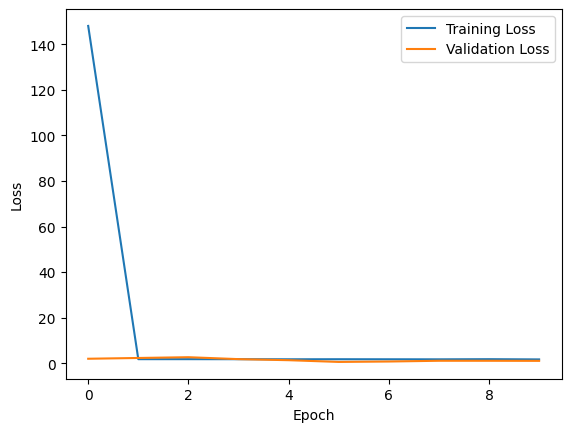

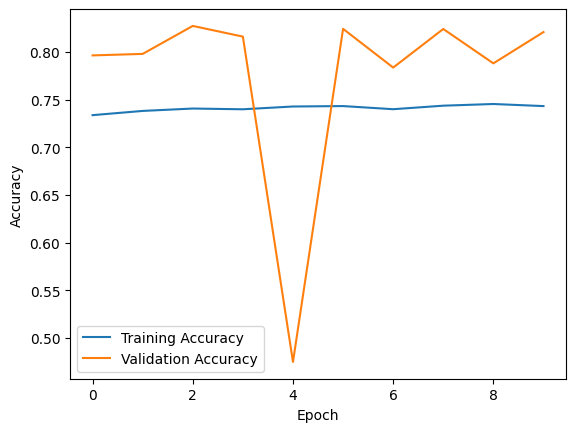

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Define a function that creates the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=10))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    return model

# Create a KerasClassifier object that can be used with scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Calculate 5-fold cross-validation scores
cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5)

# Print the cross-validation scores and average accuracy
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Fit the model on the training data
model.fit(X_train_pca, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test_pca)

# Calculate the testing accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the cross-validation scores, average accuracy, and evaluation metrics
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())
print("Testing accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

In [22]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Define the input and target variables
# X = new_df.drop(['Label'], axis=1)
# y = new_df['Label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Test the classifier on the testing data
y_pred = rf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'AUC score: {auc:.2f}')


Accuracy: 0.90
Precision: 0.80
Recall: 0.55
F1-score: 0.66
AUC score: 0.76


In [23]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create several classifiers
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
bg = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=42)

# Train each classifier on the reduced data
dt.fit(X_train_pca, y_train)
knn.fit(X_train_pca, y_train)
bg.fit(X_train_pca, y_train)
gb.fit(X_train_pca, y_train)
ab.fit(X_train_pca, y_train)

# Create a voting classifier that combines the predictions of all the classifiers
voting_clf = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('bg', bg), ('gb', gb), ('ab', ab)], voting='hard')

# Train the voting classifier on the training data
voting_clf.fit(X_train_pca, y_train)

# Test the voting classifier on the testing data
y_pred = voting_clf.predict(X_test_pca)

# Evaluate the accuracy, precision, recall, F1-score, and AUC of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
# print(f'AUC score: {auc:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create several classifiers
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
bg = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=42)

# Train each classifier on the reduced data using cross-validation
dt_scores = cross_val_score(dt, X_train_pca, y_train, cv=5, scoring='accuracy')
knn_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
bg_scores = cross_val_score(bg, X_train_pca, y_train, cv=5, scoring='accuracy')
gb_scores = cross_val_score(gb, X_train_pca, y_train, cv=5, scoring='accuracy')
ab_scores = cross_val_score(ab, X_train_pca, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of each score
print(f'DT accuracy: {dt_scores.mean():.2f} +/- {dt_scores.std():.2f}')
print(f'KNN accuracy: {knn_scores.mean():.2f} +/- {knn_scores.std():.2f}')
print(f'BG accuracy: {bg_scores.mean():.2f} +/- {bg_scores.std():.2f}')
print(f'GB accuracy: {gb_scores.mean():.2f} +/- {gb_scores.std():.2f}')
print(f'AB accuracy: {ab_scores.mean():.2f} +/- {ab_scores.std():.2f}')

# # Create a voting classifier that combines the predictions of all the classifiers
# voting_clf = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('bg', bg), ('gb', gb), ('ab', ab)], voting='hard')

# # Train the voting classifier on the training data
# voting_clf.fit(X_train_pca, y_train)

# # Test the voting classifier on the testing data
# y_pred = voting_clf.predict(X_test_pca)

# # Evaluate the accuracy, precision, recall, F1-score, and AUC of the voting classifier
# accuracy = cross_val_score(voting_clf, X_train_pca, y_train, cv=5, scoring='accuracy')
# precision = cross_val_score(voting_clf, X_train_pca, y_train, cv=5, scoring='precision_weighted')
# recall = cross_val_score(voting_clf, X_train_pca, y_train, cv=5, scoring='recall_weighted')
# f1 = cross_val_score(voting_clf, X_train_pca, y_train, cv=5, scoring='f1_weighted')



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

DT accuracy: 0.92 +/- 0.04
KNN accuracy: 0.95 +/- 0.06
BG accuracy: 0.93 +/- 0.05
GB accuracy: 0.93 +/- 0.05
AB accuracy: 0.94 +/- 0.04


In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Naive Bayes classifier on the reduced data
clf = GaussianNB()
clf.fit(X_train_pca, y_train)

# Evaluate the model using cross-validation
cv_accuracy = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='precision_weighted')
cv_recall = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='recall_weighted')
cv_f1 = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='f1_weighted')

# Print the mean and standard deviation of each score
print(f'CV accuracy: {cv_accuracy.mean():.2f} +/- {cv_accuracy.std():.2f}')
print(f'CV precision: {cv_precision.mean():.2f} +/- {cv_precision.std():.2f}')
print(f'CV recall: {cv_recall.mean():.2f} +/- {cv_recall.std():.2f}')
print(f'CV F1-score: {cv_f1.mean():.2f} +/- {cv_f1.std():.2f}')

# Evaluate the model on the testing data
y_pred = clf.predict(X_test_pca)
accuracy = clf.score(X_test_pca, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Testing accuracy: {accuracy:.2f}')
print(f'Testing precision: {precision:.2f}')
print(f'Testing recall: {recall:.2f}')
print(f'Testing F1-score: {f1:.2f}')

CV accuracy: 0.88 +/- 0.05
CV precision: 0.89 +/- 0.05
CV recall: 0.88 +/- 0.05
CV F1-score: 0.87 +/- 0.06
Testing accuracy: 0.93
Testing precision: 0.93
Testing recall: 0.93
Testing F1-score: 0.93


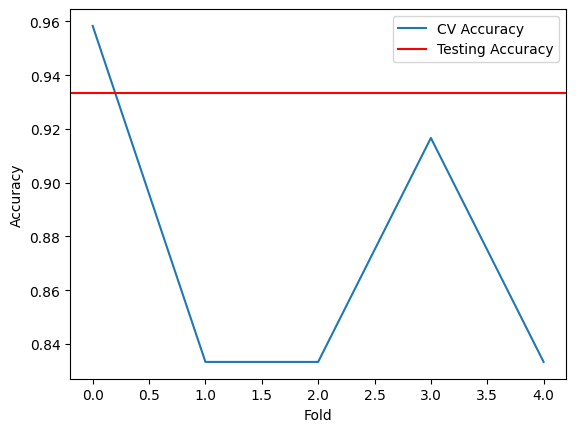

In [26]:
# Plot the CV accuracy and testing accuracy
plt.plot(cv_accuracy, label='CV Accuracy')
plt.axhline(y=accuracy, color='r', label='Testing Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM classifier on the reduced data
clf = SVC(kernel='linear')

# Evaluate the model using cross-validation
cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=5)

# Print the mean cross-validation accuracy and standard deviation
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Fit the model on the training data
clf.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test_pca)

# Calculate the precision, recall, and F1 score on the test data
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)




Cross-validation accuracy: 0.95 (+/- 0.08)
Accuracy: 0.9666666666666667
Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1 score: 0.966750208855472


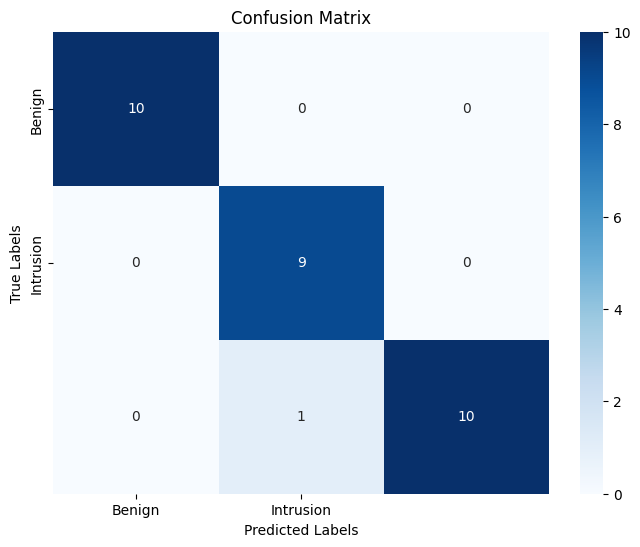

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the custom label names
label_names = ['Benign', 'Intrusion']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Remove the last row from the confusion matrix
# cm = cm[:-1, :]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()